In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D,Dense,Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

X = np.pad(X, ((0,0),(2,2),(2,2)))

X = X.reshape((X.shape[0],32,32,1))

y = to_categorical(y)

X = X.astype('float32')
X /= 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
    model = Sequential()

    model.add(Conv2D(filters=6 , kernel_size=(5,5) , strides=(1,1) , activation="tanh" , input_shape=(32 , 32 , 1)))

    model.add(AveragePooling2D((2,2)))

    model.add(Conv2D(filters=16 , kernel_size=(5,5) , strides=(1,1) , activation="tanh" ))

    model.add(AveragePooling2D((2,2)))

    model.add(Flatten())

    model.add(Dense(units=120 , activation="tanh"))

    model.add(Dropout(0.2))

    model.add(Dense(units=84 , activation="tanh"))

    model.add(Dropout(0.2))

    model.add(Dense(units=10 , activation="softmax"))

    adam = Adam(learning_rate=0.01)

    model.compile(optimizer=adam , loss = 'binary_crossentropy'  , metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X , y ,validation_split=0.33, epochs=10, batch_size=100)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.7623 - loss: 0.1299 - val_accuracy: 0.9616 - val_loss: 0.0246
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9515 - loss: 0.0348 - val_accuracy: 0.9669 - val_loss: 0.0210
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9605 - loss: 0.0285 - val_accuracy: 0.9687 - val_loss: 0.0199
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.9645 - loss: 0.0255 - val_accuracy: 0.9757 - val_loss: 0.0162
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9683 - loss: 0.0236 - val_accuracy: 0.9736 - val_loss: 0.0168
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9692 - loss: 0.0232 - val_accuracy: 0.9774 - val_loss: 0.0147
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.9713 - loss: 0.0214 - val_accuracy: 0.9781 - val_loss: 0.0147
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.9724 - loss: 0.0214 - 

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

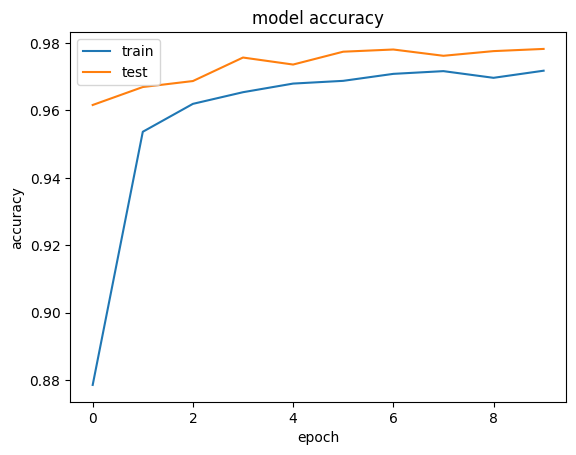

In [10]:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

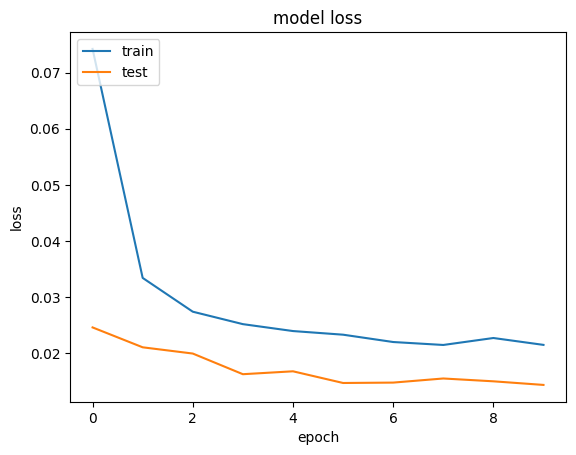

In [11]:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()